# Background

### Z+Jets

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
from funcs import *
hep.style.use("CMS")
#%matplotlib inline
plt.ioff()

lum = 1 # fb-1

In [2]:
csvFiles = "background/ZpJets/ZpJets_"
nFiles = 50
dfs = [pd.read_csv(csvFiles+str(i)+".csv") for i in range(1,nFiles+1)]
data_z = pd.concat(dfs)
data_z.to_csv("background/ZpJets.csv", index=False)

In [3]:
data_z.describe()

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_eta2,electron_eta3,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3
count,1.917484e+06,1.806715e+06,1.687069e+06,1.571413e+06,1.917484e+06,1.806715e+06,1.687069e+06,1.571413e+06,1.917484e+06,1.806715e+06,...,452.000000,24.000000,95883.000000,8343.000000,452.000000,24.000000,95883.000000,8343.000000,452.000000,24.000000
mean,2.126867e+01,1.175501e+01,8.283898e+00,6.784098e+00,2.752267e-03,8.683066e-03,1.247533e-02,1.517906e-02,7.024777e-04,1.371485e-03,...,0.199160,0.572076,-0.000846,-0.020135,-0.023566,0.310086,0.001554,-0.002997,-0.017699,-0.250000
std,2.554486e+01,1.369632e+01,6.846751e+00,4.138087e+00,2.289627e+00,2.514706e+00,2.600656e+00,2.644799e+00,1.813610e+00,1.814097e+00,...,2.793545,2.504834,1.812355,1.801809,1.850323,1.609777,1.000004,1.000055,1.000951,0.989071
min,3.000007e+00,3.000003e+00,3.000000e+00,3.000001e+00,-5.597657e+00,-5.603987e+00,-5.610033e+00,-5.598981e+00,-3.141591e+00,-3.141591e+00,...,-4.954478,-4.140129,-3.141493,-3.141409,-3.118356,-2.874632,-1.000000,-1.000000,-1.000000,-1.000000
25%,8.239549e+00,5.836233e+00,4.937179e+00,4.471897e+00,-1.682188e+00,-1.904254e+00,-2.005594e+00,-2.054382e+00,-1.570731e+00,-1.571414e+00,...,-1.819445,-1.027747,-1.569851,-1.547393,-1.632380,-1.070038,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.322277e+01,8.383929e+00,6.753894e+00,5.912772e+00,-1.083362e-03,-2.460645e-05,-1.700856e-03,-3.251818e-03,1.756828e-03,2.253665e-03,...,0.173945,0.853595,-0.010203,-0.047134,-0.071661,0.642574,1.000000,-1.000000,-1.000000,-1.000000
75%,2.414145e+01,1.252271e+01,9.321251e+00,7.846846e+00,1.672728e+00,1.895022e+00,1.997348e+00,2.056187e+00,1.572024e+00,1.571936e+00,...,2.620358,2.574179,1.566661,1.510246,1.618687,1.483328,1.000000,1.000000,1.000000,1.000000
max,1.253642e+03,8.988361e+02,4.782599e+02,2.637871e+02,5.996959e+00,6.003622e+00,5.999815e+00,5.999251e+00,3.141592e+00,3.141586e+00,...,5.161246,4.659732,3.141570,3.141402,3.129135,3.134139,1.000000,1.000000,1.000000,1.000000


In [4]:
csvFiles = "background/WpJets/WpJets_"
nFiles = 50
dfs = [pd.read_csv(csvFiles+str(i)+".csv") for i in range(1,nFiles+1)]
data_w = pd.concat(dfs)
data_w.to_csv("background/WpJets.csv", index=False)

In [5]:
data_w.describe()

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_eta2,electron_eta3,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3
count,1.981153e+06,1.863085e+06,1.737236e+06,1.616119e+06,1.981153e+06,1.863085e+06,1.737236e+06,1.616119e+06,1.981153e+06,1.863085e+06,...,3612.000000,182.000000,759907.000000,44436.000000,3612.000000,182.000000,759907.000000,44436.000000,3612.000000,182.000000
mean,2.169372e+01,1.187241e+01,8.329329e+00,6.807712e+00,1.080514e-04,5.281794e-03,1.336714e-02,1.627306e-02,2.100229e-03,-2.035506e-03,...,0.124109,0.167686,0.002409,-0.003518,-0.067612,-0.160481,0.154131,0.000135,-0.012735,0.164835
std,2.407823e+01,1.342781e+01,6.802262e+00,4.187169e+00,2.317403e+00,2.513957e+00,2.604639e+00,2.651675e+00,1.813264e+00,1.813951e+00,...,2.760551,2.584547,1.813526,1.810589,1.806046,1.800465,0.988051,1.000011,1.000057,0.989042
min,3.000028e+00,3.000013e+00,3.000003e+00,3.000001e+00,-5.602970e+00,-5.610536e+00,-5.602629e+00,-5.604396e+00,-3.141592e+00,-3.141592e+00,...,-4.995465,-4.915782,-3.141586,-3.140944,-3.137936,-3.135631,-1.000000,-1.000000,-1.000000,-1.000000
25%,8.385741e+00,5.850905e+00,4.934136e+00,4.464135e+00,-1.721900e+00,-1.905858e+00,-2.004028e+00,-2.063827e+00,-1.566505e+00,-1.574089e+00,...,-2.151877,-1.574531,-1.567967,-1.567186,-1.637238,-1.831533,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.392419e+01,8.470442e+00,6.776684e+00,5.918945e+00,-1.504472e-03,-6.358664e-03,-4.041217e-03,1.253606e-03,4.542783e-03,-2.294420e-03,...,0.084142,0.404557,0.002959,-0.011372,-0.122468,-0.363788,1.000000,1.000000,-1.000000,1.000000
75%,2.686862e+01,1.281599e+01,9.398579e+00,7.882429e+00,1.707438e+00,1.886923e+00,2.002086e+00,2.063778e+00,1.572344e+00,1.567103e+00,...,2.445535,2.020710,1.572481,1.566943,1.474323,1.340672,1.000000,1.000000,1.000000,1.000000
max,9.110306e+02,7.036896e+02,3.798388e+02,2.805003e+02,5.999970e+00,5.999008e+00,5.999980e+00,6.001646e+00,3.141587e+00,3.141590e+00,...,5.195249,5.178611,3.141588,3.141007,3.140778,3.092609,1.000000,1.000000,1.000000,1.000000


Cross Sections

In [6]:
nMetaRuns = 5

CSs = {"run": [],
       "ZpJets": [],
       "errorZpJets": [],
       "NeventsZpJets": [],
       "WpJets": [],
       "errorWpJets": [],
       "NeventsWpJets": []}

run = 1

for i in range(nMetaRuns):
       outFile = f"background/outputs/output{i}.out"
       outData = open(outFile, "r")
       outText = outData.read()
       outData.close()

       counter = 1
       indexWpJ = int(outText.find('WpJets'))
       indexZpJ = int(outText.find('ZpJets'))
       if indexZpJ < indexWpJ:
              BGtype1 = 'Z'
              BGtype2 = 'W'
       else:
              BGtype1 = 'W'
              BGtype2 = 'Z'
       indexCS = outText.find('Matched cross-section :   ')
       indexPM = outText.find(' +- ', indexCS)
       indexPB = outText.find(' pb', indexCS)
       indexNe = outText.find('Nb of events after merging :  ', indexCS)
       while indexCS != -1:
              if counter <= 10:
                     CSs[f"{BGtype1}pJets"].append(float(outText[indexCS+26:indexPM]))
                     CSs[f"error{BGtype1}pJets"].append(float(outText[indexPM+4:indexPB]))
                     CSs[f"Nevents{BGtype1}pJets"].append(int(outText[indexNe+30:indexNe+36]))
                     CSs["run"].append(run)
                     run += 1
              else:
                     CSs[f"{BGtype2}pJets"].append(float(outText[indexCS+26:indexPM]))
                     CSs[f"error{BGtype2}pJets"].append(float(outText[indexPM+4:indexPB]))
                     CSs[f"Nevents{BGtype2}pJets"].append(int(outText[indexNe+30:indexNe+36]))
              indexCS = outText.find('Matched cross-section :', indexCS+1)
              indexPM = outText.find(' +- ', indexCS)
              indexPB = outText.find(' pb', indexCS)
              indexNe = outText.find('Nb of events after merging :  ', indexCS)
              counter +=1

In [7]:
crossSec = pd.DataFrame(CSs) # pb
crossSec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   run            50 non-null     int64  
 1   ZpJets         50 non-null     float64
 2   errorZpJets    50 non-null     float64
 3   NeventsZpJets  50 non-null     int64  
 4   WpJets         50 non-null     float64
 5   errorWpJets    50 non-null     float64
 6   NeventsWpJets  50 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 2.9 KB


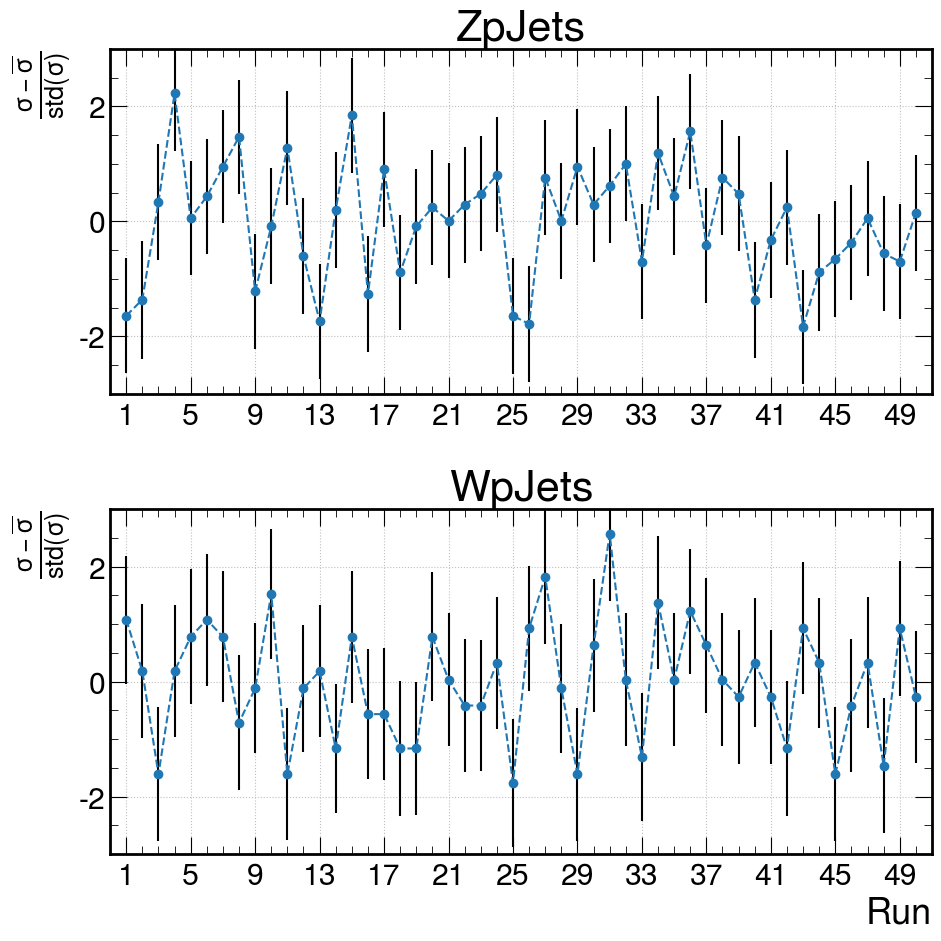

In [8]:
fig, ax = plt.subplots(2,1)
ax[0].errorbar(crossSec["run"], (crossSec["ZpJets"]-crossSec["ZpJets"].mean())/crossSec["ZpJets"].std(), yerr=crossSec["errorZpJets"]/crossSec["ZpJets"].std(), marker='o', linestyle='--', ecolor="black")
ax[1].errorbar(crossSec["run"], (crossSec["WpJets"]-crossSec["WpJets"].mean())/crossSec["WpJets"].std(), yerr=crossSec["errorWpJets"]/crossSec["WpJets"].std(), marker='o', linestyle='--', ecolor="black")
ax[0].set_title("ZpJets")
ax[1].set_title("WpJets")
ax[1].set_xlabel("Run")
ax[0].set_ylabel(r"$\frac{\sigma - \overline{\sigma}}{\mathrm{std}(\sigma)}$")
ax[1].set_ylabel(r"$\frac{\sigma - \overline{\sigma}}{\mathrm{std}(\sigma)}$")
ax[0].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[1].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[0].set_ylim(-3,3)
ax[1].set_ylim(-3,3)
ax[0].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[1].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

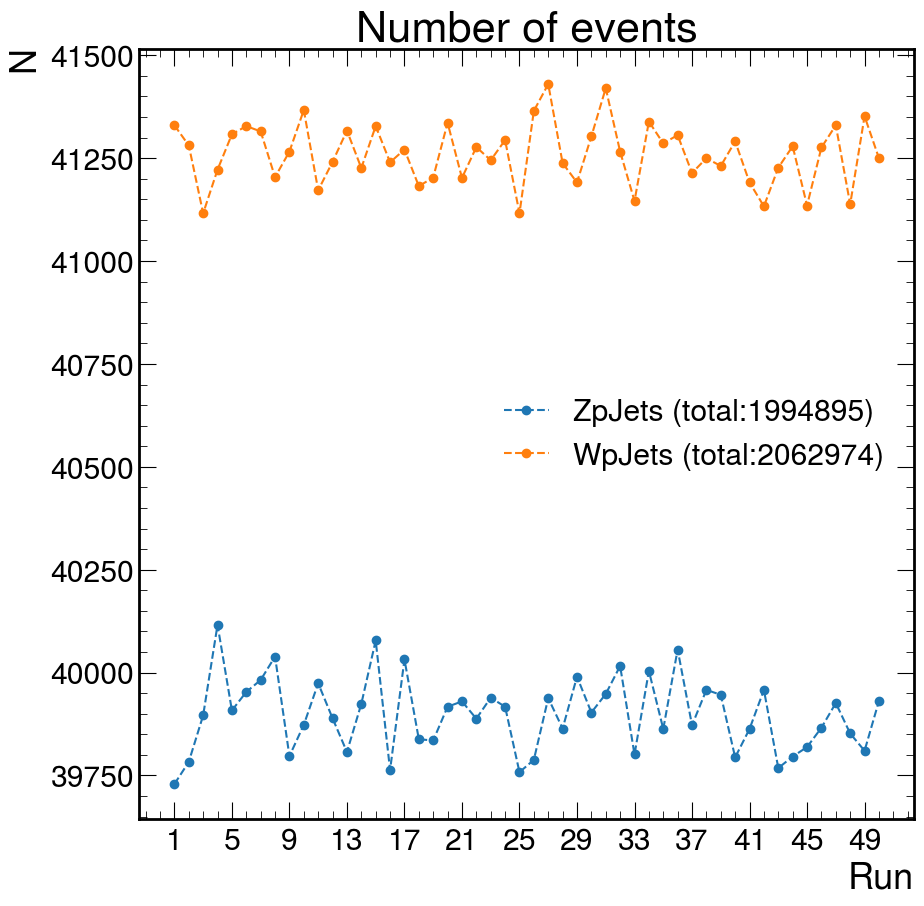

In [9]:
plt.plot(crossSec["run"],crossSec["NeventsZpJets"], marker='o', linestyle='--', label=f'ZpJets (total:{data_z.shape[0]})')
plt.plot(crossSec["run"],crossSec["NeventsWpJets"], marker='o', linestyle='--', label=f'WpJets (total:{data_w.shape[0]})')
plt.title("Number of events")
plt.xlabel("Run")
plt.ylabel(r"$N$")
plt.xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
plt.legend()
plt.show()

In [10]:
(crossSec["NeventsZpJets"]*crossSec["errorZpJets"]/(crossSec["ZpJets"]*1000)**2)

0     1.080833e-08
1     1.106774e-08
2     1.085252e-08
3     1.064834e-08
4     1.068803e-08
5     1.076691e-08
6     1.057620e-08
7     1.066108e-08
8     1.073363e-08
9     1.085815e-08
10    1.060288e-08
11    1.091491e-08
12    1.082935e-08
13    1.081175e-08
14    1.068764e-08
15    1.082343e-08
16    1.071838e-08
17    1.081918e-08
18    1.076175e-08
19    1.069094e-08
20    1.076227e-08
21    1.081231e-08
22    1.076578e-08
23    1.069745e-08
24    1.085694e-08
25    1.086741e-08
26    1.068527e-08
27    1.088119e-08
28    1.080080e-08
29    1.078095e-08
30    1.064457e-08
31    1.073457e-08
32    1.080951e-08
33    1.069139e-08
34    1.090941e-08
35    1.077697e-08
36    1.070757e-08
37    1.065522e-08
38    1.071704e-08
39    1.087747e-08
40    1.090825e-08
41    1.073234e-08
42    1.068605e-08
43    1.087884e-08
44    1.080181e-08
45    1.071369e-08
46    1.074355e-08
47    1.074498e-08
48    1.083225e-08
49    1.079581e-08
dtype: float64

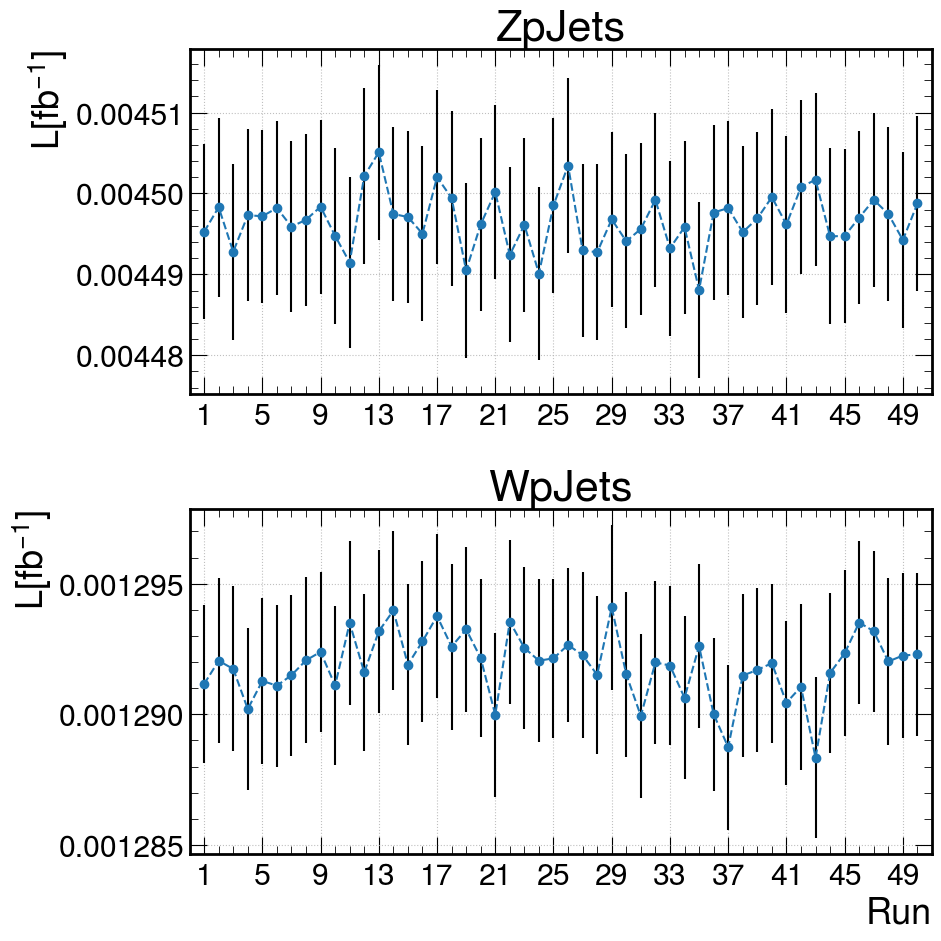

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].errorbar(crossSec["run"], crossSec["NeventsZpJets"]*(1/1000)/(crossSec["ZpJets"]), yerr=(crossSec["NeventsZpJets"]*crossSec["errorZpJets"]*(1/1000)/(crossSec["ZpJets"])**2), marker='o', linestyle='--', ecolor="black")
ax[1].errorbar(crossSec["run"], crossSec["NeventsWpJets"]*(1/1000)/(crossSec["WpJets"]), yerr=(crossSec["NeventsWpJets"]*crossSec["errorWpJets"]*(1/1000)/(crossSec["WpJets"])**2), marker='o', linestyle='--', ecolor="black")
ax[0].set_title("ZpJets")
ax[1].set_title("WpJets")
ax[1].set_xlabel("Run")
ax[0].set_ylabel(r"$\mathcal{L} [$fb$^{-1}]$")
ax[1].set_ylabel(r"$\mathcal{L} [$fb$^{-1}]$")
ax[0].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[1].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
#ax[0].set_ylim(-3,3)
#ax[1].set_ylim(-3,3)
ax[0].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[1].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

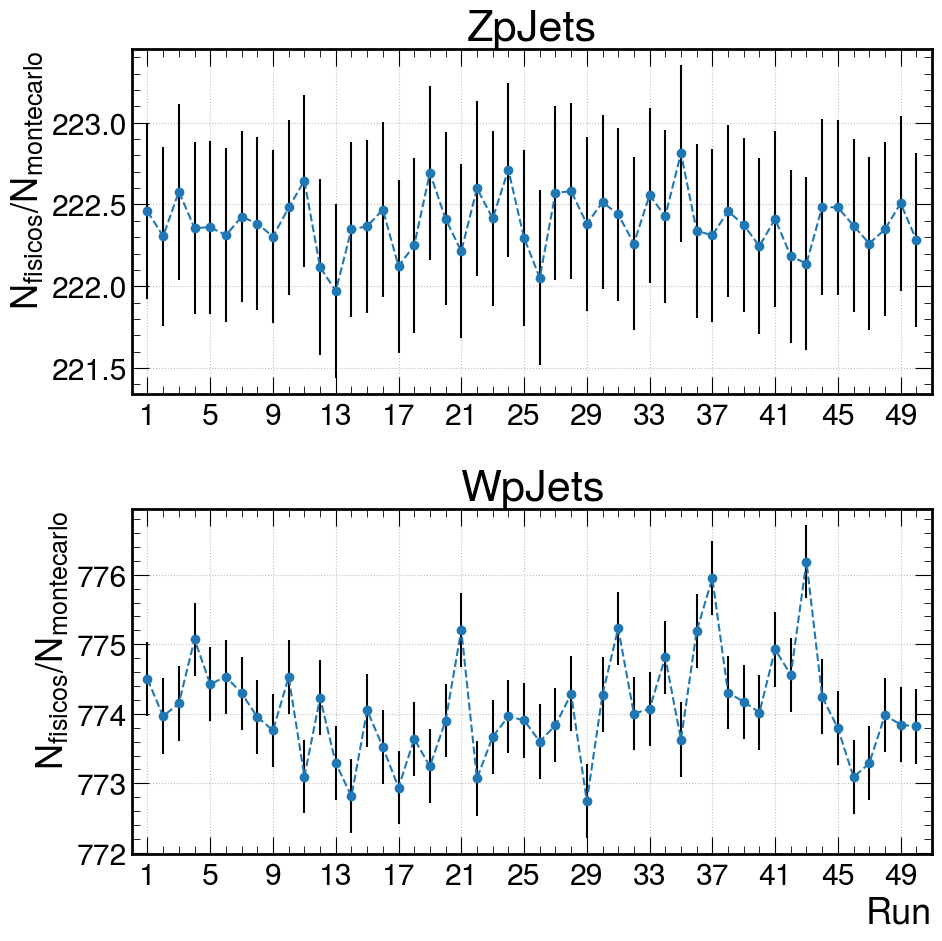

In [12]:
fig, ax = plt.subplots(2,1)
ax[0].errorbar(crossSec["run"], (crossSec["ZpJets"]*1000*lum)/crossSec["NeventsZpJets"], yerr=(crossSec["errorZpJets"]*1000*lum)/crossSec["NeventsZpJets"], marker='o', linestyle='--', ecolor="black")
ax[1].errorbar(crossSec["run"], (crossSec["WpJets"]*1000*lum)/crossSec["NeventsWpJets"], yerr=(crossSec["errorZpJets"]*1000*lum)/crossSec["NeventsZpJets"], marker='o', linestyle='--', ecolor="black")
ax[0].set_title("ZpJets")
ax[1].set_title("WpJets")
ax[1].set_xlabel("Run")
ax[0].set_ylabel(r"$N_{fisicos}/N_{montecarlo}$")
ax[1].set_ylabel(r"$N_{fisicos}/N_{montecarlo}$")
ax[0].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[1].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
#ax[0].set_ylim(-3,3)
#ax[1].set_ylim(-3,3)
ax[0].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[1].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

Valores promedio

In [13]:
labels = ['WpJets', 'ZpJets']
CSmean = [crossSec[i].mean() for i in labels]
dCSmean = [crossSec[f'error{i}'].mean() for i in labels]
totEvents = [crossSec[f'Nevents{i}'].sum() for i in labels]
totLuminosity = [totEvents[i]/CSmean[i] for i in range(2)]
dtotLuminosity = [dCSmean[i]*totLuminosity[i]/CSmean[i] for i in range(2)]
weight = [CSmean[i]*1000*lum/totEvents[i] for i in range(2)]
dweight = [dCSmean[i]*1000*lum/totEvents[i] for i in range(2)]
phyEvents = [weight[i]*totEvents[i] for i in range(2)]

print("Cross-section:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{CSmean[i]} +- {round(dCSmean[i],2)} pb")

print("Total Events:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{totEvents[i]}")

print("MG+Pythia Luminosity:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{round(totLuminosity[i],2)} +- {round(dtotLuminosity[i],2)} pb^(-1)")

print(f"Weights with L={lum} fb^(-1)")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{round(weight[i],2)} +- {round(dweight[i],2)}")

print("Total Physical Events:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{phyEvents[i]}")

Cross-section:
	WpJets:  31937.8 +- 76.73 pb
	ZpJets:  8872.8 +- 21.25 pb
Total Events:
	WpJets:  2062974
	ZpJets:  1994895
MG+Pythia Luminosity:
	WpJets:  64.59 +- 0.16 pb^(-1)
	ZpJets:  224.83 +- 0.54 pb^(-1)
Weights with L=1 fb^(-1)
	WpJets:  15.48 +- 0.04
	ZpJets:  4.45 +- 0.01
Total Physical Events:
	WpJets:  31937800.0
	ZpJets:  8872800.0


In [14]:
Weight = {'WpJets': [weight[0]], 'ZpJets': [weight[1]]}
dfWeight = pd.DataFrame(Weight)
dfWeight.to_csv("BGweigths.csv")

In [15]:
data_w.columns

Index(['jet_pt0', 'jet_pt1', 'jet_pt2', 'jet_pt3', 'jet_eta0', 'jet_eta1',
       'jet_eta2', 'jet_eta3', 'jet_phi0', 'jet_phi1', 'jet_phi2', 'jet_phi3',
       'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3', 'jet_btag0',
       'jet_btag1', 'jet_btag2', 'jet_btag3', 'jet_tautag0', 'jet_tautag1',
       'jet_tautag2', 'jet_tautag3', 'missinget_met', 'missinget_phi',
       'muon_pt0', 'muon_pt1', 'muon_pt2', 'muon_pt3', 'muon_eta0',
       'muon_eta1', 'muon_eta2', 'muon_eta3', 'muon_phi0', 'muon_phi1',
       'muon_phi2', 'muon_phi3', 'muon_charge0', 'muon_charge1',
       'muon_charge2', 'muon_charge3', 'electron_pt0', 'electron_pt1',
       'electron_pt2', 'electron_pt3', 'electron_eta0', 'electron_eta1',
       'electron_eta2', 'electron_eta3', 'electron_phi0', 'electron_phi1',
       'electron_phi2', 'electron_phi3', 'electron_charge0',
       'electron_charge1', 'electron_charge2', 'electron_charge3'],
      dtype='object')

In [16]:
data_w[data_w['jet_pt0'].isnull()][data_w.columns[24:]]

,missinget_met,missinget_phi,muon_pt0,muon_pt1,muon_pt2,muon_pt3,muon_eta0,muon_eta1,muon_eta2,muon_eta3,...,electron_eta2,electron_eta3,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3
54,1.356266,0.551965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,39.614204,0.330192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,28.292337,0.759576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,24.592506,1.728949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,43.577232,1.351555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41140,34.577553,2.447788,38.652313,NaN,NaN,NaN,2.320846,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41164,39.232906,-0.432486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.736975,NaN,NaN,NaN,1.0,NaN,NaN,NaN
41176,23.856043,-0.186315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.999482,NaN,NaN,NaN,-1.0,NaN,NaN,NaN
41227,26.890327,-0.312662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.866790,NaN,NaN,NaN,-1.0,NaN,NaN,NaN
